# BINANCE STOCK PRICE PREDICTION

## Project Summary

## Business Understanding 

Binance is a leading cryptocurrency exchange and a major player in the digital asset space. Its stock prices or token values are influenced by a variety of factors such as market demand, news, regulations, and macroeconomic conditions. Accurate predictions can help users maximize returns and manage risks.

- Key Stakeholders:

Retail Traders and Investors: Seeking to optimize their trading strategies.
Institutional Investors: Using predictions to manage portfolios and hedge risks.
Binance Ecosystem Participants: Interested in understanding market trends.
Business Goals:

Enable informed trading by predicting short-term price movements.
Enhance investment decision-making through trend analysis.
Mitigate risks by identifying potential downturns in advance.
Technical Goals:

Develop a robust machine learning model that accurately predicts price movements.
Integrate relevant external data such as market sentiment, trading volumes, and news sentiment.
Value Proposition:
Providing an accurate and actionable predictive system improves confidence in decision-making, supports profitability for users, and strengthens Binance's position as a transparent and data-driven ecosystem.

- Metrics of Success:

Prediction Accuracy: High precision in predicting stock or token price changes.
Model Interpretability: Ease of understanding key drivers of predictions.
ROI Improvement: Demonstrated better returns or reduced risks for users.

### Objective


- To predict the future price movements of Binance's stock or cryptocurrency assets to empower investors and traders with data-driven insights for making informed decisions.


## Data preparation

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [22]:
df = pd.read_csv("bnb.csv")

In [23]:
df.head()

,ticker,date,open,high,low,close
0,BNB,2017-09-08,1.3000,1.3100,0.8887,1.0100
1,BNB,2017-09-09,1.0100,1.0400,0.8627,0.9706
2,BNB,2017-09-10,0.9507,0.9889,0.8747,0.9468
3,BNB,2017-09-11,0.9406,1.1100,0.9149,1.0500
4,BNB,2017-09-12,1.0300,1.1600,0.9898,1.0400


In [24]:
df.index

RangeIndex(start=0, stop=2650, step=1)

In [25]:
df = df.drop("ticker", axis=1)

In [26]:
df.head()


,date,open,high,low,close
0,2017-09-08,1.3000,1.3100,0.8887,1.0100
1,2017-09-09,1.0100,1.0400,0.8627,0.9706
2,2017-09-10,0.9507,0.9889,0.8747,0.9468
3,2017-09-11,0.9406,1.1100,0.9149,1.0500
4,2017-09-12,1.0300,1.1600,0.9898,1.0400


In [27]:
df = df.set_index('date')

In [28]:
df.head()

,open,high,low,close
date,,,,
2017-09-08,1.3000,1.3100,0.8887,1.0100
2017-09-09,1.0100,1.0400,0.8627,0.9706
2017-09-10,0.9507,0.9889,0.8747,0.9468
2017-09-11,0.9406,1.1100,0.9149,1.0500
2017-09-12,1.0300,1.1600,0.9898,1.0400


<Axes: xlabel='date'>

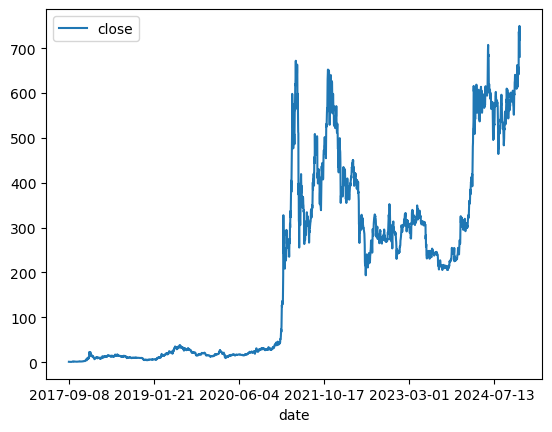

In [29]:
df.plot.line(y="close", use_index=True)

In [30]:
df["tomorrow"] = df["close"].shift(-1)

In [31]:
df.head()

,open,high,low,close,tomorrow
date,,,,,
2017-09-08,1.3000,1.3100,0.8887,1.0100,0.9706
2017-09-09,1.0100,1.0400,0.8627,0.9706,0.9468
2017-09-10,0.9507,0.9889,0.8747,0.9468,1.0500
2017-09-11,0.9406,1.1100,0.9149,1.0500,1.0400
2017-09-12,1.0300,1.1600,0.9898,1.0400,0.9374


In [32]:
df["target"] = (df["tomorrow"] > df["close"]).astype(int)

In [33]:
df.head()

,open,high,low,close,tomorrow,target
date,,,,,,
2017-09-08,1.3000,1.3100,0.8887,1.0100,0.9706,0
2017-09-09,1.0100,1.0400,0.8627,0.9706,0.9468,0
2017-09-10,0.9507,0.9889,0.8747,0.9468,1.0500,1
2017-09-11,0.9406,1.1100,0.9149,1.0500,1.0400,0
2017-09-12,1.0300,1.1600,0.9898,1.0400,0.9374,0


In [34]:
df.describe()

,open,high,low,close,tomorrow,target
count,2650.000000,2650.000000,2650.000000,2650.000000,2649.000000,2650.000000
mean,209.806639,215.701241,203.581398,210.064996,210.143914,0.509811
std,208.019553,213.546993,201.990237,208.179737,208.179391,0.499998
min,0.698600,0.716600,0.648100,0.688200,0.688200,0.000000
25%,15.952500,16.492500,15.422500,15.990000,15.990000,0.000000
50%,216.136000,221.043000,213.329500,216.486000,216.492000,1.000000
75%,334.625000,345.031750,323.743250,335.047500,335.150000,1.000000
max,749.604000,793.907000,728.934000,749.514000,749.514000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 2017-09-08 to 2024-12-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2650 non-null   float64
 1   high      2650 non-null   float64
 2   low       2650 non-null   float64
 3   close     2650 non-null   float64
 4   tomorrow  2649 non-null   float64
 5   target    2650 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 199.1+ KB


In [36]:
#higher n_estimators means better accuracy upto a certain point.
# higher min_sample slit prevents overfitting but reduces accuracy find the best
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)


In [37]:
# in time series dont use cross validation or other techniques, it causes leakege using future data to predict the past
train = df.iloc[:-100]
test = df.iloc[100:]

predics = ["open", "high", "low", "close"]

rfc.fit(train[predics],test["target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [38]:
from sklearn.metrics import precision_score

predictions = rfc.predict(test[predics])

In [39]:
predictions = pd.Series(predictions, index=test.index)

In [40]:
precision_score(test["target"], predictions)

0.5093684941013186

In [41]:
def predict(train, test, predics, rfc):
    rfc.fit(train[predics],test["target"])
    predictions = rfc.predict(test[predics])
    predictions = pd.Series(predictions, index=test.index)
    combined = pd.concat([test["target"], predics], axis=1)
    return combined

In [48]:
def backtest(data, rfc, predics, start=250, step=25):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predics, rfc)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)